<AxesSubplot:xlabel='price', ylabel='Count'>

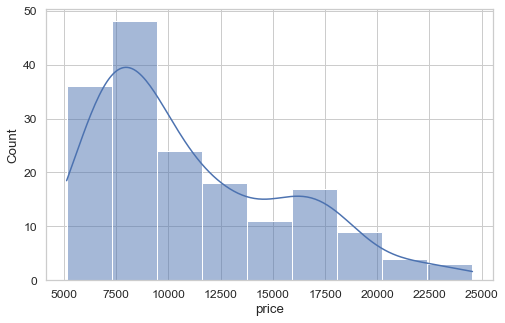

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_excel('./Data/car_data_selection.xlsx')
df = pd.DataFrame(data)
#print(df)
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

numeric_variables = df[["price","carwidth","enginesize","stroke","compressionratio","horsepower","peakrpm","boreratio","curbweight","highwaympg","wheelbase","carlength","carheight","citympg"]]


#Change this for variable specific graphs
current_variable = 'price'

#print(numeric_variables.describe())
from scipy.stats import mode,skew,kurtosis,normaltest,kstest
import numpy as np
import scipy as sp
import scipy.stats


def confidence_interval(variable, confidence):
    a = 1.0 * np.array(variable)
    n = len(a)
    mean = np.mean(a)
    sem = scipy.stats.sem(a)
    h = sem * sp.stats.t.ppf((1+confidence)/2., n-1)
    return mean-h, mean+h

def normal_test(variable, confidence):

    from scipy.stats import normaltest, kstest
    normal_test_result = normaltest(variable)
    kstest_result = kstest(variable, 'norm')
    
    print("[Normality Test]")
    print('\nStatistic: ', normal_test_result.statistic, '\nP-Value: ', normal_test_result.pvalue)

    if(normal_test_result.pvalue > confidence):
        print('Normal Test pass:  ✅✅✅✅✅✅✅✅✅')
     
    else:
        print('Normal Test pass:  ❌❌❌❌❌❌❌❌❌')
     
    print("\n[KS Test]")
    print('Statistic: ', kstest_result.statistic, '\nP-Value: ', kstest_result.pvalue)

    if(kstest_result.pvalue > confidence):
        print('KS Test pass:  ✅✅✅✅✅✅✅✅✅')
    else:
        print('KS Test pass:  ❌❌❌❌❌❌❌❌❌')


def descriptive_numeric(variable):
    modeResult = mode(variable)
    normalTestResult = normaltest(variable)
    KSTestResult = kstest(variable,'norm')
    print(variable.describe())
    print("[Mode]: The value ", modeResult.mode, ' appears ', modeResult.count, 'times.')
    print("[Skewness]: ",skew(variable))
    print("[Kurtosis]: ", kurtosis(variable))
    normal_test(variable, 0.05)
    print("\n[Confidence Interval]: ",confidence_interval(variable, 0.95))


#plots the current variable histaogram
sns.histplot(data=numeric_variables, x=current_variable, kde=True)

# for i in numeric_variables:
#      print('#################### ' + i +'  ####################')
#      descriptive_numeric(numeric_variables[i])
#      #sns.distplot(numeric_variables[i],norm_hist=False, bins=20)
    

    


#Pearson Correlation Matrix
#numeric_variables.corr(method='pearson', min_periods=1)





